# ¿Que más se podría hacer?

- Test con data augmentation y la LSTM
- Usar los tokenizadores usados en los transformers para ver como funcionan
- TSNE de embeddings y analizar si hay interpretación
- Probar con otras encimas o proteinas
- Usar los embeddings entrenados para analizar resultados de proteinas o encimas con menos data
- Entrenar una red neuronal con los features (fingerprints por ejemplo) y comparar los resultados con los embeddings


# Tome cualquiera de estas propuestas o alguna suya y desarrolle

# Temas a tratar:
## 01- Probar Random Forest Usando Fingerprints Transformation
## 02 - TSNE de Embedings
## 03- Probar Modelo de humanos con data para Ratoness (misma proteina)
## 04- Entrenar Modelo para ratas con Embedings pre-entrenados del Modelo de Humanos

### Use env project_nlp

------------------------------------------------------------------------------------------------------------------------------

## 01- Probar Random Forest Usando Fingerprints Transformation
#### Objetivo: Tener una baseline en base a lo que se hace en el vide
-Prueba 1. Baseline - Random Forest Sin busqueda de Hiperparametros ni pre-procesamiento de data

-Prueba 2. Removiendo Variables con poca Varianza (ref video)

-Prueba 3. Agregando busqueda de Hiperparametros

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [20]:
#Importo Data
df = pd.read_csv('data/acetylcholinesterase_02_bioactivity_data_preprocessed.csv')
df.head()

,molecule_chembl_id,canonical_smiles,standard_value,standard_value_norm,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,750.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,100.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,50000.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,300.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,800.0,6.096910


In [69]:
## Importo Data Transformada
X = df['canonical_smiles'].values
Y = df['pIC50'].values

## Desde el Noteboo fingerprints_transformation, importo X_fp
## Use otro Notebook para la transforamtion, para usar otro env por problemas de dependicias
import csv
with open('data/fingerprints.csv', newline='') as f:
    reader = csv.reader(f)
    X_fp = list(reader)
    
print(len(Y))
print(len(X))
print(len(X_fp))
print(len(X_fp[1]))


5663
5663
5663
256


In [70]:
X_fp = np.array(X_fp)
Y = np.array(Y)


In [71]:
# Split Data Train / Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_fp, Y, test_size=0.2, random_state=42)
len(X_train), len(y_train), len(X_test)

(4530, 4530, 1133)

#### 1.1 Model Random Forest

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
model_01 = RandomForestRegressor(n_estimators = 500)
model_01 = model_01.fit(X_train, y_train)

In [72]:
# Test Performance
y_pred_test = model_01.predict(X_test)
y_pred_train = model_01.predict(X_train)

print("Train Score: {}".format(r2_score(y_train,y_pred_train)))
print("Test Score: {}".format(r2_score(y_test,y_pred_test)))

Train Score: 0.9306981127335615
Test Score: 0.5221183619296683


<function matplotlib.pyplot.show(close=None, block=None)>

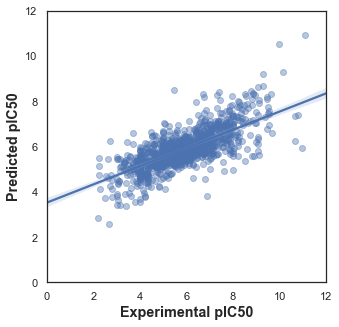

In [37]:
# Plot predicted vs ground truth (test)
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_test, y=y_pred_test, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

In [33]:
# save
with open('models/RF_model_01.pkl','wb') as f:
    pickle.dump(model_01,f)

# load
with open('models/RF_model_01.pkl', 'rb') as f:
    clf2 = pickle.load(f)

#### 1.2 Model Random Forest - Take Features with Low Variance

In [34]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold = (.8 * (1 - .8)))
X_fs = selection.fit_transform(X_fp)
X_fs.shape

(5663, 171)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_fs, Y, test_size=0.2, random_state=42)
len(X_train), len(y_train), len(X_test)

(4530, 4530, 1133)

In [36]:
model_02 = RandomForestRegressor(n_estimators = 500)
model_02 = model_02.fit(X_train, y_train)

In [39]:
# Test Performance
y_pred_test = model_02.predict(X_test)
y_pred_train = model_02.predict(X_train)

print("Train Score: {}".format(r2_score(y_train,y_pred_train)))
print("Test Score: {}".format(r2_score(y_test,y_pred_test)))

Train Score: 0.9292381112852222
Test Score: 0.5188252177207655


<function matplotlib.pyplot.show(close=None, block=None)>

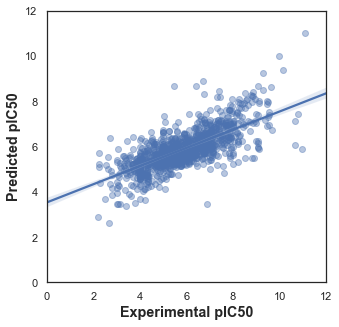

In [40]:
# Plot predicted vs ground truth (test)
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_test, y=y_pred_test, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

In [41]:
# save
with open('models/RF_model_02.pkl','wb') as f:
    pickle.dump(model_02,f)

# load
with open('models/RF_model_02.pkl', 'rb') as f:
    clf2 = pickle.load(f)

#### 1.3 Model Random Forest - Con Busqueda de Hiperparametros

In [112]:
#Búsqueda de hiperparámetros
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'n_estimators': [600, 800, 1000, 1200],
              'max_depth': [None, 30, 20, 10],
              'min_samples_split':[2,4,8],
              'min_samples_leaf':[1,2,4,8],
              'min_weight_fraction_leaf':[0.,0.01, 0.02],
              'max_features':[None,1],
              'max_leaf_nodes':[None,50,100],
              'min_impurity_decrease':[0.,0.05,0.1] 
            }

In [113]:
trees= RandomForestRegressor()
hpier_serch_model = RandomizedSearchCV(trees, param_grid, n_iter=100, cv=4,verbose=1,n_jobs=-1)
hpier_serch_model.fit(X_train,y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 30, 20, 10],
                                        'max_features': [None, 1],
                                        'max_leaf_nodes': [None, 50, 100],
                                        'min_impurity_decrease': [0.0, 0.05,
                                                                  0.1],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 4, 8],
                                        'min_weight_fraction_leaf': [0.0, 0.01,
                                                                     0.02],
                                        'n_estimators': [600, 800, 1000, 1200]},
                   verbose=1)

In [114]:
import joblib
joblib.dump(hpier_serch_model, 'models/random_forest_param_serch.pkl')
joblib.load("models/random_forest_param_serch.pkl")
hpier_serch_model.best_params_

{'n_estimators': 1000,
 'min_weight_fraction_leaf': 0.0,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_impurity_decrease': 0.0,
 'max_leaf_nodes': 100,
 'max_features': None,
 'max_depth': None}

In [120]:
model_03 = RandomForestRegressor(n_estimators = 1000,
                            min_weight_fraction_leaf = 0.0,
                            min_samples_split = 2,
                            min_samples_leaf = 1,
                            min_impurity_decrease = 0.0,
                            max_leaf_nodes = 100,
                            max_features = None,
                            max_depth = None,
                            random_state=10)

model_03 = model_03.fit(X_train, y_train)

In [121]:
y_pred_test = model_03.predict(X_test)
y_pred_train = model_03.predict(X_train)

print("Train Score: {}".format(r2_score(y_train,y_pred_train)))
print("Test Score: {}".format(r2_score(y_test,y_pred_test)))

Train Score: 0.8488115303692653
Test Score: 0.5244094592910972


In [117]:
# save
with open('models/RF_model_03.pkl','wb') as f:
    pickle.dump(model_03,f)

# load
with open('models/RF_model_03.pkl', 'rb') as f:
    clf2 = pickle.load(f)

## 02 - TSNE de Embedings
Objetivo: Analizar interpretabilidad de los embedings entrenados en 003 y 004

#### 02.01 Embeding Tokenizor Keras

In [55]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import load_model

In [56]:
# Genero Tokenizador de Letras
df = pd.read_csv('data/acetylcholinesterase_02_bioactivity_data_preprocessed.csv')
df['canonical_len'] = df['canonical_smiles'].apply(lambda x: len(x))
max_sequence_len = df['canonical_len'].max()

tokenizer = Tokenizer(
    num_words = None,
    filters='',
    lower=False,
    split=' ',
    char_level=True,
    oov_token=None)

tokenizer.fit_on_texts(X)

# Get Vocabulary letters
letters = list(tokenizer.word_index.keys())

In [57]:
## LSTM Model
# Métrica
def R2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true - y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

model_loaded = load_model('models\embed_64_bi_lstm_100_dense_50_bn.h5', custom_objects={'R2': R2})
# Retirve Embedings Layer
embeding_layer = model_loaded.layers[0].get_weights()[0][1:]

c:\Users\JuanManuelAlbergoli\anaconda3\envs\final_project_bioinformatics\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\JuanManuelAlbergoli\anaconda3\envs\final_project_bioinformatics\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


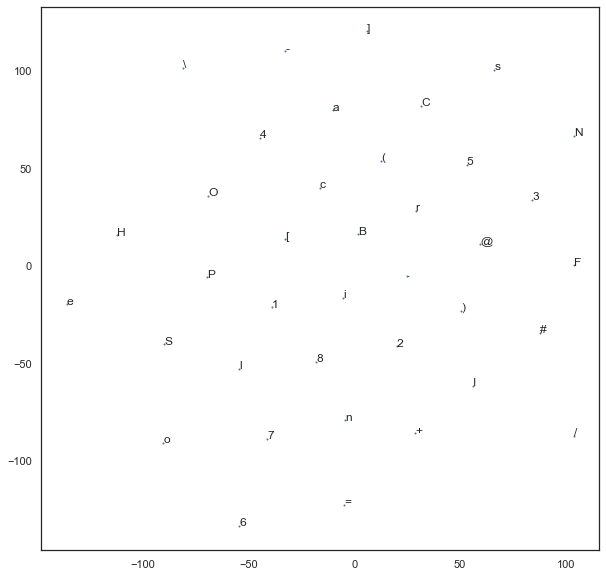

In [58]:
#Create TSNE Model and plot
tsne = TSNE(2)
X_tsne =  tsne.fit_transform(embeding_layer)

plt.figure(figsize=[10, 10])
plt.scatter(X_tsne[:,0],X_tsne[:,1],s=1)
for i, t in enumerate(letters):
    plt.text(X_tsne[i,0],X_tsne[i,1],t)

#### 02.02 Embeding Tokenizodr-Smiles

In [67]:
#Import Model
filename = 'models/embed_128_text_cnn_aug_100x100_0.0001.h5'
model_loaded = load_model(filename, custom_objects={'R2': R2})
#Get embeding Layer
embeding_layer = model_loaded.layers[1].get_weights()[0][1:]
# Import Smiles Dict
from datagen import smiles_dict
#Get letters
letters = smiles_dict.keys()

print(len(embeding_layer))
print(len(letters))

42
42


c:\Users\JuanManuelAlbergoli\anaconda3\envs\final_project_bioinformatics\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\JuanManuelAlbergoli\anaconda3\envs\final_project_bioinformatics\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


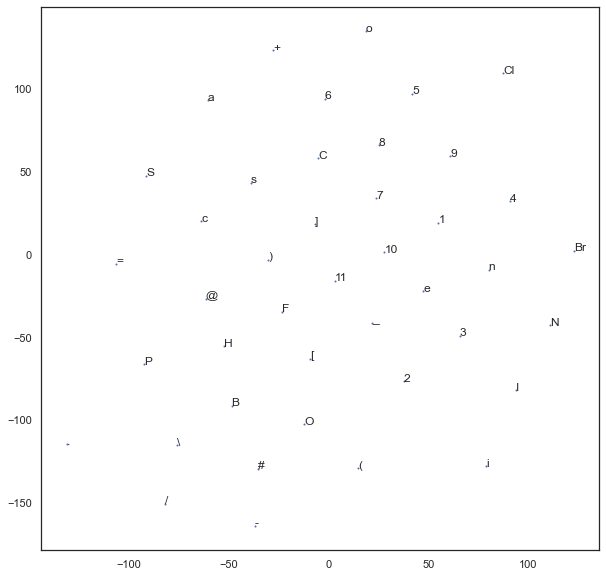

In [65]:
#Create TSNE Model and plot
tsne = TSNE(2)
X_tsne = tsne.fit_transform(embeding_layer)

plt.figure(figsize=[10, 10])
plt.scatter(X_tsne[:,0],X_tsne[:,1],s=1)
for i, t in enumerate(letters):
    plt.text(X_tsne[i,0],X_tsne[i,1],t)

Los embedings no lograron hacer grupos definidos de caracteres. Se ve que los numeros estan relativamente cercanos entre si, pero no hay mayor interpretabilidad.

Next stepts: Hacer una busqueda mas exaustiva de la dim del embeding y mayor entrenamiento

## 03- Probar Modelo de humanos con data para ratas
Se descargo el data set de la misma proteina pero en vez de utilizar el Homo Sapiens como especie se tomo Ratones (Rattus norvegicus). El objetivo de este ejercio es ver cuan relacionados estan estas dos proteinas en Humanos y Ratones.
Como en inbestigacion se suele utilizar Ratones puede ser interesante ver la relacion entre estos y poder intrpolar resultados de una especie a la otra.

La idea original era crear un dataset con compuestos y medida IC50 para ambas especies y hacer un modelo con dos salidas, una para Humanos y otra para Ratones.

Pero al haber pocos compuestos que se tiene esta iformacion para ambas especies, se descarto.

In [92]:
with open('data/rat_fingerprints.csv', newline='') as f:
    reader = csv.reader(f)
    X_rat_fp = list(reader)
    
X_rat_fp = np.array(X_rat_fp)

df_rat = pd.read_csv('data/rat_data.csv')

Y_rat = df_rat['pIC50'].values
Y_rat = np.array(Y_rat)

print(len(X_rat_fp))
print(len(Y_rat))


1476
1476


In [93]:
## Pruebo con el modelo de RF mas simple (para humanos da un Score de ~50%)
y_pred_rat = model_01.predict(X_rat_fp)
print("Test Score: {}".format(r2_score(Y_rat,y_pred_rat)))

Test Score: 0.15804639995130743


## 04- Entrenar Modelo para ratas con Embedings pre-entrenados del Modelo de Humanos
#### 04.01 Entreno LSTM con embeding pre-entrenados
#### 04.02 Entreno la misma red completa

#### 04.01 Entreno LSTM con embeding pre-entrenados

In [95]:
# Retrive LSTM Embeding Layer
model_loaded = load_model('models\embed_64_bi_lstm_100_dense_50_bn.h5', custom_objects={'R2': R2})
embeding_layer_weights = model_loaded.layers[0].get_weights()


In [96]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Set Tokenizer with Original Data
df = pd.read_csv('data/acetylcholinesterase_02_bioactivity_data_preprocessed.csv')
X = df['canonical_smiles']

tokenizer = Tokenizer(
    num_words = None,
    filters='',
    lower=False,
    split=' ',
    char_level=True,
    oov_token=None)

tokenizer.fit_on_texts(X)

df['canonical_len'] = df['canonical_smiles'].apply(lambda x: len(x))
max_sequence_len = df['canonical_len'].max()

vocab_size = len(tokenizer.word_index)

In [97]:
# Tokenize Rat Data
X_rat = df_rat['canonical_smiles']
y_rat = df_rat['pIC50']

X_rat_seq = tokenizer.texts_to_sequences(X_rat)

X_rat_seq_pad = pad_sequences(X_rat_seq, maxlen=max_sequence_len)

In [98]:
# Split Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_rat_seq_pad, y_rat, test_size=0.2, random_state=42)

In [99]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional, Dropout, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import backend as K

In [100]:
# Métrica
def R2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true - y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [101]:
# vocab_size = # Completar largo del vocabulario
vocab_size = len(tokenizer.word_index)
vocab_size
max_sequence_len = df['canonical_len'].max()
max_sequence_len

207

In [103]:
embed_dim = 64

model = Sequential(name='Rat_LSTM_1')
model.add(Embedding(vocab_size + 1 , embed_dim, input_length=max_sequence_len, trainable=False))
model.add(Bidirectional(LSTM(100, activation='tanh')))
model.add(Dense(50))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Dense(1))

model.layers[0].set_weights(embeding_layer_weights) 

# Implementar modelo completo
model.summary()

Model: "Rat_LSTM_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 207, 64)           2496      
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               132000    
_________________________________________________________________
dense (Dense)                (None, 50)                10050     
_________________________________________________________________
batch_normalization (BatchNo (None, 50)                200       
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 144,797
Trainable params: 142,201
Non-trainable params: 2,596
______________________________________________

In [104]:
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mse', metrics=[R2])
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), callbacks=[])

Epoch 1/50
19/19 [==============================] - 11s 346ms/step - loss: 29.6328 - R2: -14.0548 - val_loss: 26.3885 - val_R2: -12.1907
Epoch 2/50
19/19 [==============================] - 5s 273ms/step - loss: 21.6982 - R2: -10.3012 - val_loss: 27.4777 - val_R2: -12.7466
Epoch 3/50
19/19 [==============================] - 5s 277ms/step - loss: 17.5830 - R2: -8.0076 - val_loss: 30.3052 - val_R2: -14.1727
Epoch 4/50
19/19 [==============================] - 5s 285ms/step - loss: 14.2885 - R2: -6.5968 - val_loss: 25.2948 - val_R2: -11.6740
Epoch 5/50
19/19 [==============================] - 19s 1s/step - loss: 10.9338 - R2: -4.6699 - val_loss: 22.7024 - val_R2: -10.3787
Epoch 6/50
19/19 [==============================] - 18s 936ms/step - loss: 8.7213 - R2: -3.4091 - val_loss: 20.3753 - val_R2: -9.2118
Epoch 7/50
19/19 [==============================] - 6s 324ms/step - loss: 6.7319 - R2: -2.5126 - val_loss: 13.2423 - val_R2: -5.6488
Epoch 8/50
19/19 [==============================] - 6s 34

In [108]:
y_pred = model.predict(X_test)
print("Test Score: {}".format(r2_score(y_test,y_pred)))

Test Score: 0.4549366897309738


#### 04.02 Entreno LSTM completa

In [109]:
embed_dim = 64

model = Sequential(name='Rat_LSTM_2')
model.add(Embedding(vocab_size + 1 , embed_dim, input_length=max_sequence_len, trainable=True))
model.add(Bidirectional(LSTM(100, activation='tanh')))
model.add(Dense(50))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Dense(1))

# Implementar modelo completo
model.summary()

Model: "Rat_LSTM_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 207, 64)           2496      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               132000    
_________________________________________________________________
dense_2 (Dense)              (None, 50)                10050     
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 144,797
Trainable params: 144,697
Non-trainable params: 100
________________________________________________

In [110]:
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mse', metrics=[R2])
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), callbacks=[])

Epoch 1/50
19/19 [==============================] - 17s 628ms/step - loss: 34.2246 - R2: -16.5139 - val_loss: 31.2766 - val_R2: -14.6263
Epoch 2/50
19/19 [==============================] - 6s 328ms/step - loss: 28.1078 - R2: -13.6346 - val_loss: 24.2292 - val_R2: -11.1155
Epoch 3/50
19/19 [==============================] - 10s 504ms/step - loss: 23.5842 - R2: -11.0487 - val_loss: 19.9015 - val_R2: -8.9582
Epoch 4/50
19/19 [==============================] - 9s 479ms/step - loss: 19.4728 - R2: -8.8898 - val_loss: 13.4167 - val_R2: -5.7192
Epoch 5/50
19/19 [==============================] - 5s 273ms/step - loss: 15.7961 - R2: -7.0589 - val_loss: 10.2230 - val_R2: -4.1277
Epoch 6/50
19/19 [==============================] - 5s 275ms/step - loss: 12.3676 - R2: -5.4248 - val_loss: 7.3961 - val_R2: -2.7135
Epoch 7/50
19/19 [==============================] - 11s 550ms/step - loss: 9.5540 - R2: -3.9610 - val_loss: 12.8819 - val_R2: -5.4624
Epoch 8/50
19/19 [==============================] - 4s 2

In [111]:
y_pred = model.predict(X_test)
print("Test Score: {}".format(r2_score(y_test,y_pred)))

Test Score: 0.43317713748593045


Se logra un mejor Score tras 50 Epochs usando los Embedings Pre-Entrenados